# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The distribution is clearly not Gaussian, and the standard deviation is nearly as high as the average charge. Given the skewed nature of the data, as well as the outliers, it doesn't seem that the mean and std are very appropriate here.  

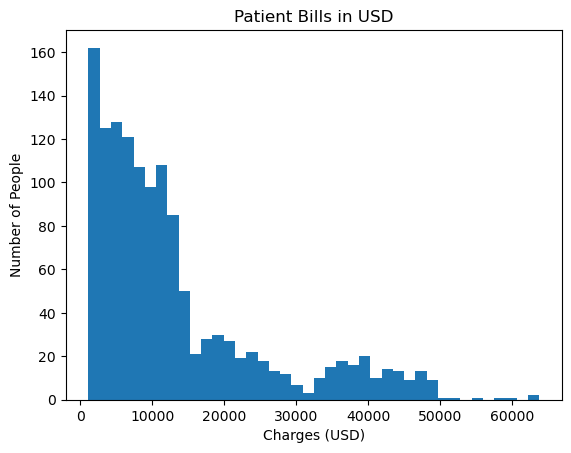

In [4]:
_ = plt.hist('charges', data=medical, bins=40);
_ = plt.xlabel('Charges (USD)')
_ = plt.ylabel('Number of People')
_ = plt.title('Patient Bills in USD')

In [5]:
avg_charge = np.mean(medical['charges'])
charge_std = np.std(medical['charges'], ddof=1)

print('mean charge: ', avg_charge, 'charge std: ', charge_std)

mean charge:  13270.422265141257 charge std:  12110.011236693996


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ A one-sided interval t-test, which is done below 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ We should care about a one-sided interval because we only care if the average charges are less than $12000

In [63]:
# a random sample size
sample_size = 100
# a one-sided test, so alpha is 0.05
alpha = 0.05

# Get the t-value
t_crit_value = t.ppf(1-alpha, df=sample_size-1)

# Calc standard error of the mean (se(y) = std(y)*sqrt(n)
std_error = charge_std/np.sqrt(sample_size)

#Calculate the 95% CI
CI_lower = avg_charge - t_crit_value * std_error
# unnecessary, but for my learning I will calculate the upper; we only care if we can determine if the average charge is below $12,000
CI_upper = avg_charge + t_crit_value * std_error

print(CI_lower, CI_upper)

11259.686709498896 15281.157820783617


We are 95% confident that the average charge for the hospital is above 11,259.69, which is very close to 12,000. The admin may have some right to be worried, but this is the lower end of the confidence interval so the probability that the mean is lower, especially by a consideral margin, seems low ('considerable' here bing less than 10% of the standard deviation in charges)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with insurance "really are" charged a different amount; the assumption being that if people have insurance they can be "charged" more because they have to pay less out of pocket. I think the alternative hypothesis is that patients are charged the same amount, regardless of insurance. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [34]:
'''
For clarity in the pooled std of the two groups, here are the variables: 
n0 = sample size for group 1
n1 = sample size for group 2
s0 = std deviation for group 1
s1 = std deviation for group 2

And for the t-test statistic:
xbar0 = mean of sample 1
xbar1 = mean of sample 2
sp = pooled std defined above
n0, n1 = sample size for groups 1, 2
'''

# n0, n1 samples
insurance_grp = medical[medical['insuranceclaim'] == 1]
no_insurance_grp = medical[medical['insuranceclaim'] == 0]
# size of n0, n1
insurance_grp_size = insurance_grp.shape[0]
no_insurance_grp_size = no_insurance_grp.shape[0]
# std of n0, n1 charges
insurance_grp_std = np.std(insurance_grp['charges'])
no_insurance_grp_std = np.std(no_insurance_grp['charges'])
# mean of n0, n1 charges
insurance_grp_mean = np.mean(insurance_grp['charges'])
no_insurance_grp_mean = np.mean(no_insurance_grp['charges'])


In [40]:
# To avoid mistakes, I'm going to calculate each term and then put it together for the equations above
sp_top = (no_insurance_grp_std**2*(no_insurance_grp_size-1)) + (insurance_grp_std**2*(insurance_grp_size-1))
sp_bottom = no_insurance_grp_size + insurance_grp_size -2

sp = np.sqrt(sp_top/sp_bottom)
print('sp: ', sp)

sp:  11512.282899205744


In [41]:
t_val_top = (no_insurance_grp_mean-insurance_grp_mean)
t_val_bottom = sp*np.sqrt((1/no_insurance_grp_size)+(1/insurance_grp_size))
t_val = t_val_top/t_val_bottom
print('t: ', t_val)

t:  -11.90130694355539


In [43]:
# to get the p-value from the t-test statistic, manually:
ddof = insurance_grp_size + no_insurance_grp_size -2

p_val = (1-t.cdf(t_val, ddof))
print(p_val)

1.0


In [49]:
ddof_ins = insurance_grp_size-1
ddof_no_ins = no_insurance_grp_size-1

t_scipy, p_scipy = ttest_ind(no_insurance_grp['charges'], insurance_grp['charges'], equal_var=True)
t_scipy, p_scipy

(-11.893299030876712, 4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test